In [1]:
# importing the libraries for data processing
import numpy as np 
import pandas as pd 

#matplotlib & seaborn for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read and process the charts dataset
df = pd.read_csv('data/df_clean.csv')

In [3]:
df.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,is_top200
0,29,0.475,0.157,0,-13.932,1,0.0307,0.785,0.002120,0.1070,0.0806,119.836,0
1,37,0.406,0.742,8,-3.135,1,0.0356,0.215,0.000410,0.0943,0.5640,179.959,0
2,25,0.523,0.759,4,-5.652,1,0.0295,0.011,0.000769,0.1090,0.6030,90.026,0
3,46,0.603,0.196,6,-14.843,1,0.0443,0.940,0.000001,0.0916,0.1600,119.529,0
4,30,0.385,0.233,11,-16.567,0,0.0358,0.937,0.002000,0.0695,0.1800,78.666,0


In [4]:
df.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,is_top200
count,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.00000,3384.000000
mean,21.270686,0.539726,0.575302,5.265957,-8.466556,0.795804,0.059313,0.329705,0.036463,0.172743,0.445090,122.73827,0.033097
std,17.837295,0.148397,0.232799,3.486583,3.660622,0.403173,0.062643,0.308907,0.138493,0.125934,0.223991,29.75608,0.178916
min,0.000000,0.000000,0.001730,0.000000,-31.047000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,3.000000,0.437000,0.396000,2.000000,-10.426750,1.000000,0.030600,0.033100,0.000000,0.096975,0.267750,98.97875,0.000000
50%,20.000000,0.545000,0.565000,5.000000,-7.844500,1.000000,0.036900,0.233000,0.000025,0.121000,0.417000,123.88600,0.000000
75%,34.000000,0.644000,0.760000,8.000000,-5.821000,1.000000,0.056025,0.593250,0.001762,0.206250,0.602000,142.79600,0.000000
max,75.000000,0.984000,0.997000,11.000000,-0.856000,1.000000,0.621000,0.995000,0.999000,0.977000,0.981000,215.93600,1.000000


In [5]:
df.shape

(3384, 13)

In [6]:
df['is_top200'].value_counts()

0    3272
1     112
Name: is_top200, dtype: int64

### Balancing Target Counts

Note: pip install imblearn first

### Version = 1

In [8]:
from imblearn.under_sampling import NearMiss
from numpy import where
from collections import Counter

feature_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
                'liveness', 'valence', 'tempo']
X = df[feature_cols]
y = df['is_top200']

# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = NearMiss(version=1, n_neighbors_ver3=3)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 3272, 1: 112})
Counter({0: 112, 1: 112})


### Data Splitting

In [9]:
from sklearn.model_selection import train_test_split

# creating training set, test set and checking shapes 
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)  # 0.2 = 20% of my data set for testing
print("Shape of X_Train:"+str(X_train.shape))
print("Shape of y_Train:"+str(y_train.shape))
print("Shape of X_Test:"+str(X_test.shape))
print("Shape of y_Test:"+str(y_test.shape))

Shape of X_Train:(179, 9)
Shape of y_Train:(179,)
Shape of X_Test:(45, 9)
Shape of y_Test:(45,)


## Random Forest Classifier

In [10]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [11]:
from sklearn.ensemble import RandomForestClassifier
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=10, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   51.7s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  2

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=10)

In [12]:
pred = rf_random.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score, classification_report
# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the random forest classifier is %f%%' % (acc))


The accuracy of the random forest classifier is 64.444444%


In [14]:
print(classification_report(y_test,rf_random.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.60      0.65        25
           1       0.58      0.70      0.64        20

    accuracy                           0.64        45
   macro avg       0.65      0.65      0.64        45
weighted avg       0.66      0.64      0.65        45



In [15]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [16]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=60, max_features='sqrt',
                       min_samples_split=5, n_estimators=600)

In [17]:
best_model = rf_random.best_estimator_

In [18]:
best_model.fit(X_train, y_train)
pred = best_model.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the random forest classifier is %f%%' % (acc))


The accuracy of the random forest classifier is 62.222222%


In [19]:
print(classification_report(y_test,best_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.60      0.64        25
           1       0.57      0.65      0.60        20

    accuracy                           0.62        45
   macro avg       0.62      0.62      0.62        45
weighted avg       0.63      0.62      0.62        45



## Feature Importance

In [20]:
importance = best_model.feature_importances_
importance

array([0.08823083, 0.08344027, 0.20979046, 0.08910214, 0.08745103,
       0.05443872, 0.07361323, 0.07288147, 0.24105185])

Text(0, 0.5, 'Features')

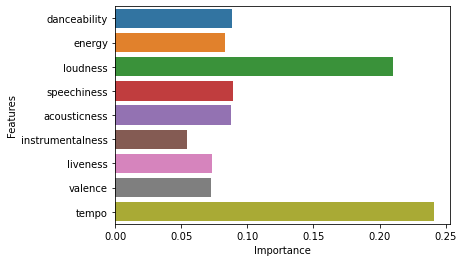

In [21]:
ax = sns.barplot(y = feature_cols, x = importance)
plt.xlabel('Importance')
plt.ylabel('Features')

In [22]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)

RandomForestRegressor()

Text(0, 0.5, 'Features')

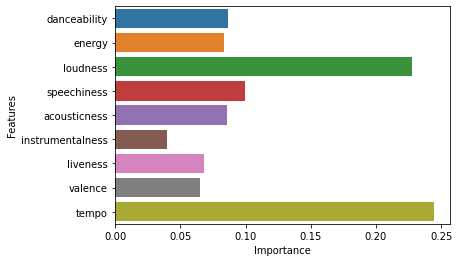

In [23]:
ax = sns.barplot(y = feature_cols, x = rfr.feature_importances_)
plt.xlabel('Importance')
plt.ylabel('Features')

### Permutation-based Feature Importance

Text(0, 0.5, 'Features')

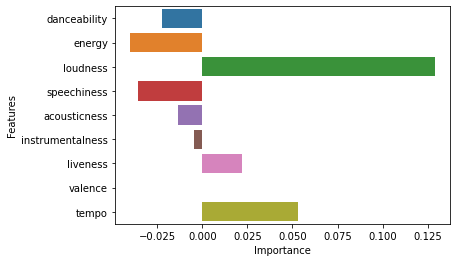

In [24]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf_random, X_test, y_test)

ax = sns.barplot(y = feature_cols, x = perm_importance.importances_mean)
plt.xlabel('Importance')
plt.ylabel('Features')

### Version 2

In [25]:
feature_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
                'liveness', 'valence', 'tempo']
X = df[feature_cols]
y = df['is_top200']

# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = NearMiss(version=2, n_neighbors_ver3=3)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 3272, 1: 112})
Counter({0: 112, 1: 112})


In [26]:
from sklearn.model_selection import train_test_split

# creating training set, test set and checking shapes 
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)  # 0.2 = 20% of my data set for testing
print("Shape of X_Train:"+str(X_train.shape))
print("Shape of y_Train:"+str(y_train.shape))
print("Shape of X_Test:"+str(X_test.shape))
print("Shape of y_Test:"+str(y_test.shape))

Shape of X_Train:(179, 9)
Shape of y_Train:(179,)
Shape of X_Test:(45, 9)
Shape of y_Test:(45,)


### Random Forest

In [27]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [28]:
from sklearn.ensemble import RandomForestClassifier
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=10, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  2

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=10)

In [29]:
pred = rf_random.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score, classification_report
# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the random forest classifier is %f%%' % (acc))


The accuracy of the random forest classifier is 93.333333%


In [31]:
print(classification_report(y_test,rf_random.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        22
           1       1.00      0.87      0.93        23

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [32]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [33]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=5,
                       n_estimators=2000)

In [34]:
best_model = rf_random.best_estimator_

In [35]:
best_model.fit(X_train, y_train)
pred = best_model.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the random forest classifier is %f%%' % (acc))


The accuracy of the random forest classifier is 93.333333%


In [36]:
print(classification_report(y_test,best_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        22
           1       1.00      0.87      0.93        23

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



Text(0, 0.5, 'Features')

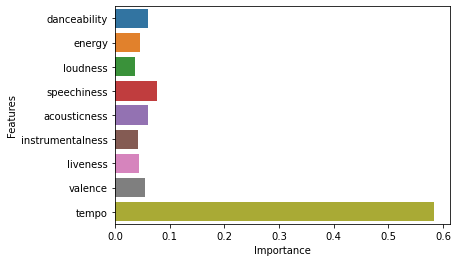

In [37]:
# Feature Importance
ax = sns.barplot(y = feature_cols, x = best_model.feature_importances_)
plt.xlabel('Importance')
plt.ylabel('Features')

In [44]:
feat_importances.sort_values(ascending=True)

loudness            0.036152
instrumentalness    0.041744
liveness            0.044327
energy              0.044937
valence             0.053915
danceability        0.059314
acousticness        0.060076
speechiness         0.076400
tempo               0.583136
dtype: float64

Text(0, 0.5, 'Features')

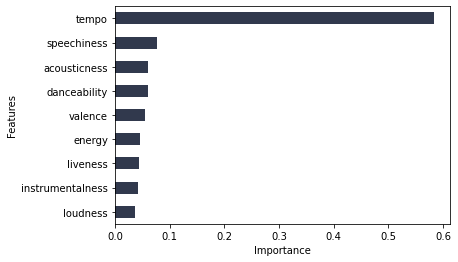

In [45]:
feat_importances = pd.Series(best_model.feature_importances_, index=feature_cols)
feat_importances.sort_values(ascending=True).plot(kind='barh', color = '#31394d')
plt.xlabel('Importance')
plt.ylabel('Features')

Text(0, 0.5, 'Features')

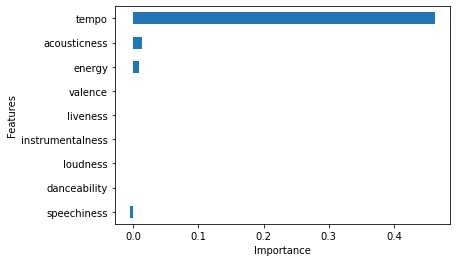

In [39]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf_random, X_test, y_test)

feat_importances = pd.Series(perm_importance.importances_mean, index=feature_cols)
feat_importances.sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')

